<div class='alert alert-warning'>

# JupyterLite warning

If you are running the current notebook in JupyterLite, you may encounter some unexpected behavior.

The main difference is that imports take longer than usual, for example the first `import sklearn` can take up to 10-20s.

If you notice problems, feel free to open an [issue](https://github.com/probabl-ai/youtube-appendix/issues/new/choose) about it.
</div>

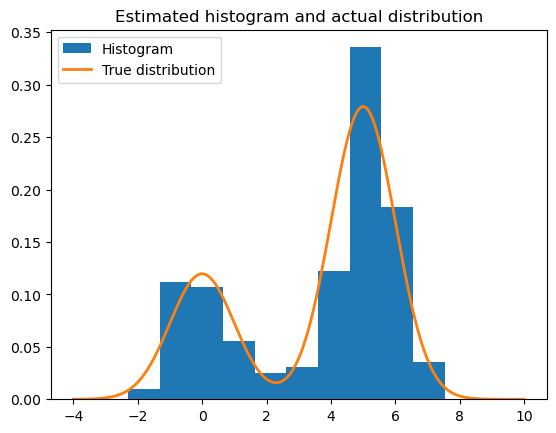

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

np.random.seed(1)
n_samples, n_bins = 200, 10

X = np.concatenate(
    (np.random.normal(0, 1, int(0.3 * n_samples)), np.random.normal(5, 1, int(0.7 * n_samples)))
)[:, np.newaxis]

xs = np.linspace(-4, 10, 200)
ys = 0.3 * norm(0, 1).pdf(xs) + 0.7 * norm(5, 1).pdf(xs)

plt.hist(X, bins=n_bins, density=True, label='Histogram')
plt.plot(xs, ys, linewidth=2, label='True distribution')
plt.legend()
plt.title('Estimated histogram and actual distribution');

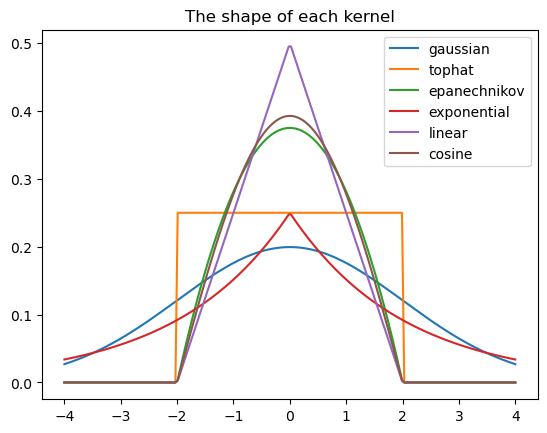

In [2]:
xs = np.linspace(-4, 4, 200)

for i, kernel in enumerate(
    ["gaussian", "tophat", "epanechnikov", "exponential", "linear", "cosine"]
):
    log_dens = KernelDensity(kernel=kernel, bandwidth=2.0).fit(np.array([[0]])).score_samples(xs.reshape(-1, 1))
    plt.plot(xs, np.exp(log_dens), label=kernel)
    
plt.legend()
plt.title('The shape of each kernel');

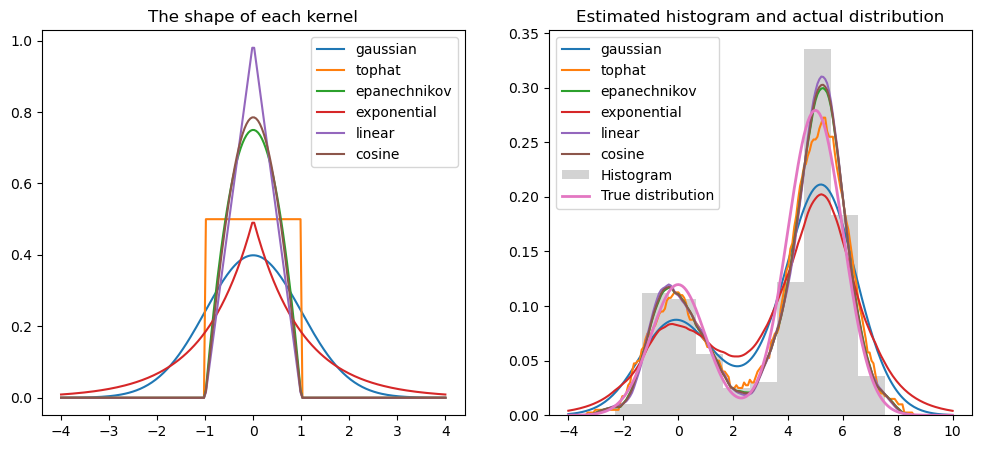

In [3]:
plt.figure(figsize=(12, 5))

plt.subplot(121)
xs = np.linspace(-4, 4, 200)
kernels = ["gaussian", "tophat", "epanechnikov", "exponential", "linear", "cosine"]

for kernel in kernels:
    log_dens = KernelDensity(kernel=kernel).fit(np.array([[0]])).score_samples(xs.reshape(-1, 1))
    plt.plot(xs, np.exp(log_dens), label=kernel)
    
plt.legend()
plt.title('The shape of each kernel');

plt.subplot(122)

xs = np.linspace(-4, 10, 200)
for kernel in kernels:
    log_dens = KernelDensity(kernel=kernel).fit(X).score_samples(xs.reshape(-1, 1))
    plt.plot(xs, np.exp(log_dens), label=kernel)
    
plt.hist(X, bins=n_bins, density=True, color='lightgray', label='Histogram')
plt.plot(xs, ys, linewidth=2, label='True distribution')
plt.legend()
plt.title('Estimated histogram and actual distribution');